In [1]:
import random
import string
import abc
from datetime import datetime


In [2]:
rand_str = lambda l : rand_str(l-1)+random.choice(string.ascii_lowercase) if l > 1 else random.choice(string.ascii_lowercase)
rand_str(10)

'ahcvzwuqda'

In [3]:
import pandas as pd

## Clases

### Productos

In [4]:
class Product(abc.ABC):
  @abc.abstractmethod
  def __init__(self,**kwargs):
    self._id = kwargs['id']
    self._interest_rate = kwargs['interest_rate']
    self._balance = 0.00
  @property
  def interest_rate(self):
    return self._interest_rate
  @property
  def id(self):
    return self._id
  @property
  def balance(self):
    return self._balance

  def to_dict(self):
    return {
      'id': self._id,
      'interest_rate': self._interest_rate,
      'balance': self.balance
    }
  @classmethod
  def getProductBalance(**kwargs):
    id = kwargs['id']


  def __repr__(self):
    return self.__class__.__name__+"("+self._id+", interest_rate="+str(self._interest_rate)+", Balance ="+str(self._balance)+")"

In [5]:
class SavingAccount(Product):
  def __init__(self,**kwargs): 
    super().__init__(**kwargs)
  

In [6]:
class FixedTermDeposit(Product):
  def __init__(self,**kwargs): 
    super().__init__(**kwargs)


In [7]:
class Loan(Product):
  def __init__(self,**kwargs): 
    super().__init__(**kwargs)
    # duracion del prestamo en meses
    self.length = kwargs['length']

    # base del calculo
    self.base = kwargs['base']
  def to_dict(self):
    d1 = super().to_dict()
    d2 = {
        "length":self.length,
        "base":self.base
    }
    return {**d1,**d2}

In [8]:
class CreditCard(Product):
  def __init__(self,**kwargs): 
    super().__init__(**kwargs)

In [9]:
PRODUCTS = (SavingAccount,FixedTermDeposit,Loan,CreditCard)

### Cliente

In [10]:
class Client():
  def __init__(self, **kwargs):
    self.id = kwargs['id']
    self.name = kwargs['name']
    self.products = kwargs['products']
  def __repr__(self):
    return "Client("+self.id+", "+self.name+", products="+str(len(self.products))+")"

### Transacciones


Las transacciones debitan o acreditan un producto, tienen un identificador, ocurrieron un día especifico y un monto.

In [11]:
class Transaction():
  def __init__(self,**kwargs):
    self._id = kwargs['id']
    #Dr/Cr
    self.nature = kwargs['nature']
    self.accounting_date = kwargs['date']
    self.amount = kwargs['amt']
    self.product = kwargs['product']
    self.mvt = kwargs['mvt']
    
  def __repr__(self):
    return self.__class__.__name__+"("+str(self._id)+","+self.accounting_date.strftime("%A, %B %d %Y")+", "+self.nature+", "+str(self.amount) +")"
  def to_dict(self):
    return {
      'id': self._id,
      'nature': self.nature,
      'accounting_date':self.accounting_date,
      'amount':self.amount,
      'product':self.product,
      'mvt': self.mvt
    }

### Transferencia

In [12]:
class Transfer():
  def __init__(self, **kwargs):
    self.to = kwargs['to']
    self.From = kwargs['from']
    self.amount = kwargs['amount']
    self._id = kwargs['id']

  def __repr__(self):
    return self.__class__.__name__+"("+self.to+","+self.From+", "+self._id+", "+self.amount +")"  
    
  def to_dict(sefl):
    return {
        'to': self.to,
        'From': self.From,
        'amount': self.amount,
        'id': self._id,
        'date': self.accounting_date
    }
  
  @classmethod
  def Execute(self, **kwargs):
    print("Executing Bank Transfer")
    b1 = df_deposits[df_deposits['id']==kwargs['to']]

    b2 = df_deposits[df_deposits['id']==kwargs['From']]
    if len(b1) == 0 or len(b2) == 0:
      print('ERROR')
    else: 
      b1 = b1.reset_index()
      b1 = b1.iloc[0]['balance']
      b2 = b2.reset_index()
      b2 = b2.iloc[0]['balance']
      print("Saldo disponible:",b2)
      if b2 >= kwargs['amount']:
        totalb1= b1 + kwargs['amount']
        totalb2= b2 - kwargs['amount']
        trans1= Transaction(
          id = prueba(random.choice(range(100000,999999))),
          product = kwargs['to'],
          nature = "Cr",
          date = datetime.now(),
          amt = kwargs['amount'],
          mvt = kwargs['amount'])
        trans2= Transaction(
          id = prueba(random.choice(range(100000,999999))),
          product = kwargs['From'],
          nature = "Dr",
          date = datetime.now(),
          amt = kwargs['amount'],
          mvt= kwargs['amount']*-1)
        global df_transactions
        df_transactions = df_transactions.append(trans1.to_dict(),ignore_index=True )
        df_transactions = df_transactions.append(trans2.to_dict(),ignore_index=True )
       
      else:
        print("No tienes saldo")


    
      



## Funciones

In [13]:
prueba = lambda s: s if (len(df_transactions[df_transactions['id']==s])) == 0 else prueba(random.choice(range(100000,999999)))

In [14]:

def generate_product_ids():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000,9999999)))
  product_ids.append(id)
  return id   


In [15]:

def generate_credit_card_number():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000000000000,9999999999999999)))
  product_ids.append(id)
  return id   


In [16]:

def generate_transaction_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(100000,9999999)))
  transaction_ids.append(id)
  return id   


In [17]:

def generate_client_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1,11)))+"-"+ str(random.choice(range(100,999)))+"-"+ str(random.choice(range(1,999)))
  ids.append(id)
  return id   


In [18]:
def generate_saving_accounts(n):
  accs = []
  for i in range(n):
    accs.append(SavingAccount(
        id = generate_product_ids()
    ))
  return accs

In [19]:
def generate_clients(n):
  clients = []
  for i in range(n):
    clients.append(Client(
        id = generate_client_id(),
        name = rand_str(10) +" "+rand_str(15),
        products = []
    ))
  return clients


In [20]:
def generate_balance():
  n = random.choice(range(0,500000))
  cash= ("${:5.2f}".format(n))
  return cash

## Generar Entidades

In [21]:
%%time
ids = []
product_ids = []
clientes = generate_clients(7)
products = []
# POR CADA PRODUCTO GENERADO...
for cliente in clientes:
  # SELECCIONO UNA CANTIDAD DE PRODUCTOS ALEATORIAMENTE
  cantidad_productos = random.choice(range(1,5))
  
  # POR LA CANTIDAD DE PRODUCTOS SELECCIONADOS...
  for p in range(0,cantidad_productos):    

    # SELECCIONO ALEATORIAMENTE UN TIPO DE PRODUCTO
    tipo_producto = PRODUCTS[random.choice(range(0,len(PRODUCTS)))]

    # INSTANCIO EL PRODUCTO
    if tipo_producto is Loan:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(3,17)),
          
          base= random.choice([365,360]),
          length = random.choice(range(1,120)))
    elif tipo_producto is CreditCard:
      producto = tipo_producto(
          id=generate_credit_card_number(),
          interest_rate=random.choice(range(1,3)),
          )
    else:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(1,3)))
 
    # RELACIONO EL PRODUCTO CON EL CLIENTE ACTUAL
    cliente.products.append(producto)
    products.append(producto)
print(type (tipo_producto.balance))

print("Productos generados:",len(products))
print("Clientes generados:",len(clientes))

<class 'property'>
Productos generados: 23
Clientes generados: 7
Wall time: 4 ms


## Generar transacciones

In [22]:
%%time
MIN_TRX = 10
MAX_TRX = 100
transactions = []
transaction_ids = []

for cliente in clientes:
  for producto in cliente.products:
    
    if type(producto) is SavingAccount or type(producto) is FixedTermDeposit :
      # SELECCIONAR UN NUMERO ALEATORIO DE TRANSACCIONES PARA CADA PRODUCTO
      n_Trx = random.choice(range(MIN_TRX,MAX_TRX))

      for trx in range(n_Trx):
        month = random.choice(range(1,13))
        # SI EL MES ES FEBRERO... ENTRE 1 Y 28
        if month == 2: day = random.choice(range(1,29))
        # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
        elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
        # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
        else: day = random.choice(range(1,30))
        amt = float(str(random.choice(range(1,999999999)))+"."+str(random.choice(range(1,99))))
        nature = "Dr" if random.choice(range(10))==0 else "Cr"
        mvt = amt*-1 if nature == 'Dr' else amt
        transactions.append(Transaction(
            id = generate_transaction_id(),
            product = producto.id,
            nature = nature,
            date = datetime(random.choice(range(2010,2020+1)),month ,day),
            amt = amt,
            mvt = mvt
        ))

print("Transacciones generadas:",len(transactions))
print("Media de transacción por cliente:",len(transactions)/len(products))

Transacciones generadas: 358
Media de transacción por cliente: 15.565217391304348
Wall time: 10 ms


## Generar tablas

In [23]:
df_loans =[]
df_deposits = []
for p in products:
  if type(p) is Loan:
    df_loans.append(p)
  if type(p) is FixedTermDeposit or type(p) is SavingAccount:
    df_deposits.append(p)


In [24]:
df_loans = pd.DataFrame.from_records([l.to_dict() for l in df_loans])
df_loans.head(3)

,id,interest_rate,balance,length,base
0,2630854,3,0.0,115,360
1,4872565,13,0.0,90,365
2,2403805,6,0.0,42,360


In [25]:
df_deposits = pd.DataFrame.from_records([d.to_dict() for d in df_deposits])
df_deposits.head(3)

,id,interest_rate,balance
0,3024112,2,0.0
1,1990848,1,0.0
2,2732165,1,0.0


In [26]:
df_transactions = pd.DataFrame.from_records([t.to_dict() for t in transactions])
df_transactions

,id,nature,accounting_date,amount,product,mvt
0,2429836,Cr,2015-12-04,4.945562e+08,3024112,4.945562e+08
1,5934593,Cr,2016-06-21,2.242419e+08,3024112,2.242419e+08
2,1093328,Cr,2018-07-24,1.272104e+08,3024112,1.272104e+08
3,4330708,Cr,2010-03-06,5.523592e+08,3024112,5.523592e+08
4,4125325,Cr,2015-07-28,2.382987e+08,3024112,2.382987e+08
...,...,...,...,...,...,...
353,3222485,Cr,2014-08-30,9.821058e+08,1117236,9.821058e+08
354,5261973,Cr,2019-06-11,6.237104e+08,1117236,6.237104e+08
355,6030721,Cr,2014-02-22,5.318027e+08,1117236,5.318027e+08
356,9353374,Cr,2014-10-23,3.091215e+08,1117236,3.091215e+08


In [27]:
#df_transactions[df_transactions['product']=='1022920']
summarize = df_transactions.groupby(['product'])['mvt']
summarize = summarize.sum()
summarize = summarize.reset_index()
#print(summarize['1022920'==summarize['product']])
for i in range(len(summarize)):
  product_id = summarize['product'].iloc[i]
  
  df_deposits.loc[df_deposits['id']==product_id,'balance'] = summarize['mvt']

df_deposits[df_deposits['id'].isin(summarize['product'])]
#print(df_deposits[summarize['product']==df_deposits['id']])

,id,interest_rate,balance
0,3024112,2,2.791291e+10
1,1990848,1,2.934463e+09
2,2732165,1,6.785750e+09
3,3763098,2,9.634030e+09
4,3649241,1,3.517294e+09
5,5942280,2,1.330598e+09
6,1171192,1,2.304797e+10
7,8891783,1,5.332215e+09
8,4232398,2,1.436608e+10
9,1117236,2,3.791723e+10


## Requerimientos


***vas a definir la funcion de ejecutar transferencia***



***tienes que buscar la informacion de las cuentas afectadas en la tabla de productos***


***vas a ver si la cuenta a acreditar tiene saldo***


vas a generar la transaccion en la tabla de transacciones


vas a modificar el balance de las cuentas afectadas en la tabla de productos



### Generar estado de cuenta

In [28]:
def getAccountStatement(**kwargs):
  
  try: kwargs['product']
  except: print("A product id is required")

  
  print("Getting account statement for product",kwargs['product'])
  df = df_transactions[df_transactions['product'] == kwargs['product']]
  
  try: start = kwargs['start'] 
  except: start = df['accounting_date'].min()
  try: end = kwargs['end']
  except: end = df['accounting_date'].max()
  
  df = df[(df.accounting_date >= start) & (df.accounting_date <= end) ]

  print("Found",len(df),"transactions from",start,"to",end)
  df = df.sort_values(by=['accounting_date'])
  df = df.reset_index()
  df = df.drop(['index'],axis=1)
  return df

In [29]:
%%time
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
print(account_stmnt)


Getting account statement for product 3024112
Found 10 transactions from 2010-03-06 00:00:00 to 2018-07-24 00:00:00
        id nature accounting_date        amount  product           mvt
0  4330708     Cr      2010-03-06  5.523592e+08  3024112  5.523592e+08
1  3907494     Cr      2010-07-05  3.657597e+08  3024112  3.657597e+08
2  8905469     Cr      2015-02-09  2.839477e+07  3024112  2.839477e+07
3  4125325     Cr      2015-07-28  2.382987e+08  3024112  2.382987e+08
4  2429836     Cr      2015-12-04  4.945562e+08  3024112  4.945562e+08
5  4606832     Cr      2016-03-24  4.018733e+07  3024112  4.018733e+07
6  5934593     Cr      2016-06-21  2.242419e+08  3024112  2.242419e+08
7  6006032     Cr      2017-04-21  6.459741e+08  3024112  6.459741e+08
8  7950668     Cr      2017-12-26  8.003112e+08  3024112  8.003112e+08
9  1093328     Cr      2018-07-24  1.272104e+08  3024112  1.272104e+08
Wall time: 86.9 ms


In [30]:
producto

SavingAccount(1117236, interest_rate=2, Balance =0.0)

#### Mostrar un gráfico con el movimiento de su producto

In [31]:
import matplotlib.pyplot as plt

In [32]:
# generar el campo valor
account_stmnt['mvt'] = 0.00
account_stmnt.loc[account_stmnt['nature']=="Dr",'mvt'] = account_stmnt['amount']
account_stmnt.loc[account_stmnt['nature']=="Cr",'mvt'] = account_stmnt['amount']*-1
account_stmnt.sum()

id         4330708390749489054694125325242983646068325934...
nature                                  CrCrCrCrCrCrCrCrCrCr
amount                                           3.51729e+09
product    3024112302411230241123024112302411230241123024...
mvt                                             -3.51729e+09
dtype: object

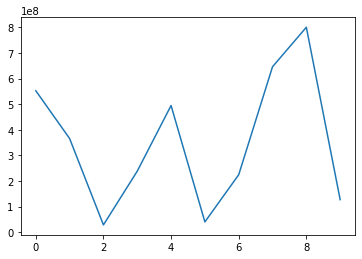

In [33]:
plt.plot(account_stmnt.amount)
plt.show()

### Ejecutar Transferencia

In [34]:
Transfer.Execute(to=df_transactions.iloc[0]['product'], From=df_transactions.iloc[-1]['product'], amount= 4)



Executing Bank Transfer
Saldo disponible: 37917231958.84


In [35]:
df_transactions.tail(2)

,id,nature,accounting_date,amount,product,mvt
358,838674,Cr,2020-09-27 17:41:59.888707,4.0,3024112,4.0
359,876250,Dr,2020-09-27 17:41:59.889706,4.0,1117236,-4.0


In [36]:
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
account_stmnt

Getting account statement for product 3024112
Found 11 transactions from 2010-03-06 00:00:00 to 2020-09-27 17:41:59.888707


,id,nature,accounting_date,amount,product,mvt
0,4330708,Cr,2010-03-06 00:00:00.000000,5.523592e+08,3024112,5.523592e+08
1,3907494,Cr,2010-07-05 00:00:00.000000,3.657597e+08,3024112,3.657597e+08
2,8905469,Cr,2015-02-09 00:00:00.000000,2.839477e+07,3024112,2.839477e+07
3,4125325,Cr,2015-07-28 00:00:00.000000,2.382987e+08,3024112,2.382987e+08
4,2429836,Cr,2015-12-04 00:00:00.000000,4.945562e+08,3024112,4.945562e+08
5,4606832,Cr,2016-03-24 00:00:00.000000,4.018733e+07,3024112,4.018733e+07
6,5934593,Cr,2016-06-21 00:00:00.000000,2.242419e+08,3024112,2.242419e+08
7,6006032,Cr,2017-04-21 00:00:00.000000,6.459741e+08,3024112,6.459741e+08
8,7950668,Cr,2017-12-26 00:00:00.000000,8.003112e+08,3024112,8.003112e+08
9,1093328,Cr,2018-07-24 00:00:00.000000,1.272104e+08,3024112,1.272104e+08


In [37]:
for p in products:
  print(p.id)

6214914381680062
2630854
3024112
1979979402916575
4872565
1500896714238098
1990848
4643079551786549
7391830727473462
2732165
3763098
3649241
2403805
2744747
6516789
6611953
5942280
1171192
8891783
4232398
9661173
3933292582587682
1117236
